In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import pingouin as pg

In [3]:
# Fetch raw data

rawdata = pd.read_csv(r'C:\Users\t.vincotte\Documents\CODE\TFE\EoF - Work\Beer_Profile\Source_Files\Beer Name Fuzzy Match List.csv') 
 

In [4]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088 entries, 0 to 1087
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Beer Name (Full)  1088 non-null   object
 1   matches           1088 non-null   object
dtypes: object(2)
memory usage: 17.1+ KB


In [8]:
for col in rawdata.columns:
    display(col)
    display(rawdata[col].unique())


'Beer Name (Full)'

array(['(512) Brewing Company (512) Pecan Porter(512) Brewing Company',
       '(512) Brewing Company (512) Whiskey Barrel Aged Double Pecan Porter(512) Brewing Company',
       '\x8eŽatecký Pivovar Žatec Dark Lager', ...,
       "Yards Brewing Co. Washington's Porter",
       'Zywiec Breweries PLC (Heineken) Tatra MocneZywiec Breweries PLC (Heineken)',
       'Zywiec Breweries PLC (Heineken) Zywiec BeerZywiec Breweries PLC (Heineken)'],
      dtype=object)

'matches'

array(['(512) Brewing Company (512) Pecan Porter',
       '(512) Brewing Company (512) Whiskey Barrel Aged Double Pecan Porter',
       '\x8eŽatecký Pivovar \x8eŽatec Dark Lager', ...,
       "Yards Brewing Co. General Washington's Tavern Porter",
       'Zywiec Breweries PLC (Heineken) Tatra',
       'Zywiec Breweries PLC (Heineken) Zywiec Beer'], dtype=object)

Outcome of value counts
------------------------------

One value count per row item
    - Full beer name
    - Matches ...... meaning to be investigated
    
    

In [16]:
FIGSIZE = (6,7)    # Taille figure en pouce - utlise dans tous les graphes
FIGSIZE2 = (3,4)

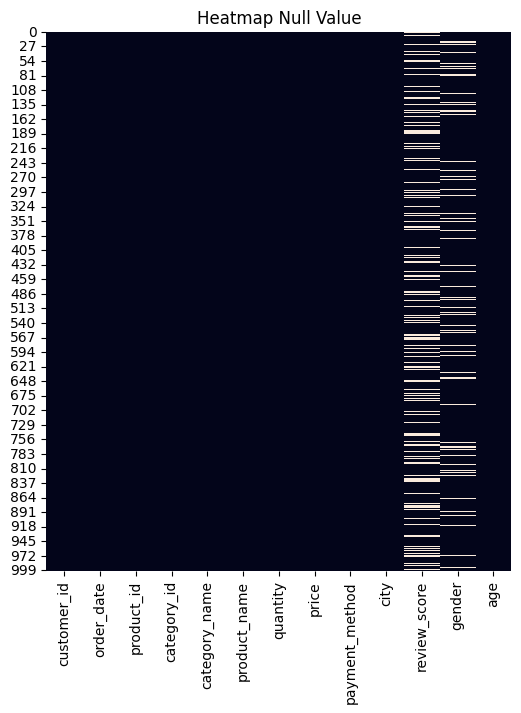

In [17]:
#   Repérer s'il y a des NULL et leur distribution / localisation
#   ---------------------------------------------------------------
plt.figure(figsize=FIGSIZE)         # Fonction figure > declarer figure dans laquelle je vais travailler
plt.title('Heatmap Null Value')     #   Titre de la figure
sns.heatmap(rawdata.isna(),cbar=False)      # Utilise graphique heatmap de seaborn dans matlpotlib / 
                                            #   isna nous dnne un masque boleen
plt.show()

NULL values in Review score and in gender

In [19]:
#   Define dataset with needed columns
#   ------------------------------------------
    # At first glance, all columns - to be seen with datasets we would merge 

synthetic_online =rawdata
synthetic_online


,customer_id,order_date,product_id,category_id,category_name,product_name,quantity,price,payment_method,city,review_score,gender,age
0,13542,2024-12-17,784,10,Electronics,Smartphone,2,373.36,Credit Card,New Oliviaberg,1.0,F,56
1,23188,2024-06-01,682,50,Sports & Outdoors,Soccer Ball,5,299.34,Credit Card,Port Matthew,NaN,M,59
2,55098,2025-02-04,684,50,Sports & Outdoors,Tent,5,23.00,Credit Card,West Sarah,5.0,F,64
3,65208,2024-10-28,204,40,Books & Stationery,Story Book,2,230.11,Bank Transfer,Hernandezburgh,5.0,M,34
4,63872,2024-05-10,202,20,Fashion,Skirt,4,176.72,Credit Card,Jenkinshaven,1.0,F,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,67967,2024-05-04,965,40,Books & Stationery,Notebook,3,495.24,Cash on Delivery,Hodgemouth,NaN,NaN,30
996,99828,2024-09-12,510,40,Books & Stationery,Story Book,5,427.73,Credit Card,Douglastown,3.0,F,72
997,92290,2024-11-06,445,10,Electronics,Smartphone,5,354.64,Bank Transfer,New Amberville,NaN,M,49
998,61427,2024-09-17,410,10,Electronics,Laptop,4,221.54,Cash on Delivery,New Sean,3.0,M,71


In [12]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     1000 non-null   int64  
 1   order_date      1000 non-null   object 
 2   product_id      1000 non-null   int64  
 3   category_id     1000 non-null   int64  
 4   category_name   1000 non-null   object 
 5   product_name    1000 non-null   object 
 6   quantity        1000 non-null   int64  
 7   price           1000 non-null   float64
 8   payment_method  1000 non-null   object 
 9   city            1000 non-null   object 
 10  review_score    799 non-null    float64
 11  gender          897 non-null    object 
 12  age             1000 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 101.7+ KB


In [ ]:
#   Etude uni-variée des différentes colonnes - schemas différents
#   -----------------------------------------------------------------
        #   Faire des boucles pour avoir graphes pour les différentes colonnes du dataset
        #   Graphes sur variables continues
#   -----------------------------------------------------------------------------------

X_continuous = rawdata[['age','price','quantity']] 

for i, col in enumerate(X_continuous.columns):
    plt.figure(figsize=(10,8))
    plt.subplot(3,3,1)
    plt.title(f'Histogram {col}')
    sns.histplot(data=rawdata, x=col,kde=True)  
    plt.subplot(3,3,2)
    plt.title(f'KDE  {col}')
    sns.kdeplot(data=rawdata, x=col,fill=True) 
    plt.subplot(3,3,3)
    plt.title(f'boxplot {col}')
    sns.boxplot(data=rawdata, x=col,fill=True) 
    plt.tight_layout()                              

plt.show() 

Distribution - pas de categorie specifique pour age , quantite ou prix
Assez logique

In [8]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     1000 non-null   int64  
 1   order_date      1000 non-null   object 
 2   product_id      1000 non-null   int64  
 3   category_id     1000 non-null   int64  
 4   category_name   1000 non-null   object 
 5   product_name    1000 non-null   object 
 6   quantity        1000 non-null   int64  
 7   price           1000 non-null   float64
 8   payment_method  1000 non-null   object 
 9   city            1000 non-null   object 
 10  review_score    799 non-null    float64
 11  gender          897 non-null    object 
 12  age             1000 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 101.7+ KB


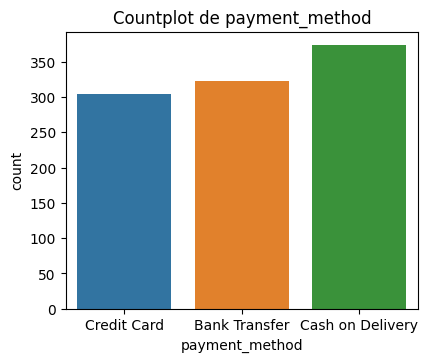

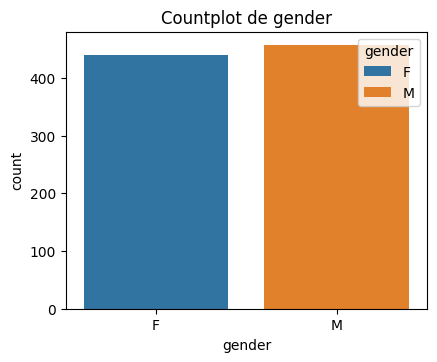

In [24]:
#   Graphes sur variables catégorielles > distribution
#   -----------------------------------------------------

X_discrete = rawdata[['payment_method','gender']] 
 
for i, col in enumerate(X_discrete):                     
    plt.figure(figsize=(12,10))
    plt.subplot(3,3,1)
    plt.title(f'Countplot de {col}')
    sns.countplot(data=rawdata,x=col,hue=col)
    plt.tight_layout() 
    plt.show() 



In [ ]:
X_discrete = rawdata[['category_name ']] 
 
for i, col in enumerate(X_discrete):                     
    plt.figure(figsize=(12,10))
    plt.subplot(3,3,1)
    plt.title(f'Countplot de {col}')
    sns.countplot(data=rawdata,x=col,hue=col)
    plt.tight_layout() 
    plt.show() 

     #  seems not to accept countplot on object types   

In [ ]:
rawdata.count()

1000 records

In [8]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     1000 non-null   int64  
 1   order_date      1000 non-null   object 
 2   product_id      1000 non-null   int64  
 3   category_id     1000 non-null   int64  
 4   category_name   1000 non-null   object 
 5   product_name    1000 non-null   object 
 6   quantity        1000 non-null   int64  
 7   price           1000 non-null   float64
 8   payment_method  1000 non-null   object 
 9   city            1000 non-null   object 
 10  review_score    799 non-null    float64
 11  gender          897 non-null    object 
 12  age             1000 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 101.7+ KB


In [5]:
#   Analysis - category - product
#   ----------------------------------------------------------

# Remove duplicates based on columns 'A' and 'B'
df_no_duplicates = rawdata.drop_duplicates(subset=['category_name', 'product_name'])
product_category = rawdata[['category_name','product_name']].sort_values(by='category_name').sort_values(by='product_name')
product_per_category = product_category.drop_duplicates(subset=['category_name', 'product_name']).sort_values(by='product_name').sort_values(by='category_name')
product_per_category



,category_name,product_name
240,Books & Stationery,Eraser
740,Books & Stationery,Notebook
663,Books & Stationery,Novel
980,Books & Stationery,Story Book
726,Books & Stationery,Pen
940,Electronics,Tablet
855,Electronics,Smartwatch
967,Electronics,Smartphone
971,Electronics,Headphones
812,Electronics,Laptop


In [6]:
product_per_category.to_excel("synthetic_online_data.xlsx",sheet_name='product_per_category')

In [10]:
#   Analysis - product price
#   ----------------------------------------------------------

# Remove duplicates based on columns 'A' and 'B'

product_price = rawdata[['category_name','product_name','price']].sort_values(by='category_name').sort_values(by='product_name')
product_price = product_price.drop_duplicates(subset=['category_name', 'product_name','price']).sort_values(by='category_name').sort_values(by='product_name')
product_price

,category_name,product_name,price
675,Sports & Outdoors,Basketball,367.94
582,Sports & Outdoors,Basketball,68.94
210,Sports & Outdoors,Basketball,405.54
243,Sports & Outdoors,Basketball,173.35
42,Sports & Outdoors,Basketball,37.87
...,...,...,...
902,Sports & Outdoors,Yoga Mat,407.83
509,Sports & Outdoors,Yoga Mat,37.17
683,Sports & Outdoors,Yoga Mat,439.96
796,Sports & Outdoors,Yoga Mat,189.30


In [11]:
product_price.to_excel("synthetic_online_data.xlsx",sheet_name='product_price')

In [12]:
#   Analysis - cities
#   ----------------------------------------------------------

# Remove duplicates based on columns 'A' and 'B'
store_city = rawdata[['city']].sort_values(by='city')
store_city  = store_city.drop_duplicates(subset=['city']).sort_values(by='city')
store_city 

,city
971,Adamsbury
255,Adamsfort
479,Adrianmouth
801,Alexanderberg
441,Alexanderborough
...,...
475,Woodsport
795,Wrightfort
826,Wrightmouth
593,Wrightport
